# The Wilson-Cowan model

In this notebook, the basic use of the implementation of the Wilson-Cowan (`wc`) model is presented. 

In the `wc` model, the activity of a particular brain region is defined by a coupled system of excitatory (E) and inhibitory (I) neuronal populations with the mean firing rates of the E and I pools being the dynamic variables, as first described by Wilson and Cowan in 1972 ( H.R. Wilson and J.D. Cowan. *Excitatory and inhibitory interactions in localized populations of model neurons*. Biophys. J., 12:1–24 (1972)) 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy
import neurolib.utils.devutils as du

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
from neurolib.utils.loadData import Dataset
from scipy.io import loadmat
from neurolib.utils.loadData import filterSubcortical

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [2]:
data_path = "/Users/pamirozsuna/Desktop/pamir_ma/SCZ-FC-modelling"

In [3]:
def averageMat(Mat):
    avMat = np.zeros((94,94))
    for i in range(len(Mat)):
        avMat = avMat + Mat[i]
    avMat = avMat/len(Mat)
    return avMat

In [4]:
C_data = np.load(data_path+"/AvgCmatrixSCZ.npy")
D_data = np.load(data_path+"/AvgDmatrixSCZ.npy")

In [5]:
Cmat_tmp = averageMat(C_data)
Dmat_tmp = averageMat(D_data)

In [6]:
Cmat = filterSubcortical(Cmat_tmp)
Dmat = filterSubcortical(Dmat_tmp)

In [7]:
FC_data = np.load(data_path+"/AvgFmatrixSCZ.npy")
timeseries = np.load(data_path+"/AvgTmatrixSCZ.npy")

In [8]:
FC_tmp = averageMat(FC_data)
FCs = filterSubcortical(FC_tmp)

In [9]:

#wc.params['exc_ext'] = 0.45
#wc.params['c_excinh'] = 10.1
#wc.params['c_inhexc'] = 9.55
#wc.params['c_inhinh'] = 0
#wc.params['K_gl'] = 1.84
#wc.params['sigma_ou'] = 4.28e-05

#wc.params['exc_ext'] = 0.45
#wc.params['c_excinh'] = 10.1
#wc.params['c_inhexc'] = 9.95
#wc.params['c_inhinh'] = 0
#wc.params['K_gl'] = 1.84
#wc.params['sigma_ou'] = 4.28e-05
total_gbc_model = []
total_scores_model = []
i_list = []

input = np.linspace(5, 15, 100) 

for i in range(len(input)): 
    wc = WCModel(Cmat = Cmat, Dmat = Dmat)
    wc.params['duration'] = 40*1000
    print(i)
    print(input[i])
    wc.params['exc_ext'] = 0.45
    wc.params['c_excinh'] = 10.33
    wc.params['c_inhexc'] = input[i]
    wc.params['c_inhinh'] = 0
    wc.params['K_gl'] = 1.84
    wc.params['sigma_ou'] = 4.28e-05
    wc.run(bold = True)
    gbc_model = np.mean(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10000]))
    print(gbc_model)
    total_gbc_model.append(gbc_model)
    scores = [func.matrix_correlation(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10000]), FCs)]
    total_scores_model.append(np.mean(scores))
    i_list.append(i)

0
5.0
0.9999956101959053
1
5.101010101010101
0.9999948922410249
2
5.202020202020202
0.9999955124717672
3
5.303030303030303
0.9999965310031855
4
5.404040404040404
0.999996166072652
5
5.505050505050505
0.9999955719481289
6
5.606060606060606
0.9999960440353601
7
5.707070707070707
0.9999950376569237
8
5.808080808080808
0.9999942780938685
9
5.909090909090909
0.999994128886567
10
6.01010101010101
0.9999945231709995
11
6.111111111111111
0.999994329791306
12
6.212121212121212
0.9999937993087635
13
6.313131313131313
0.9999944667377363
14
6.414141414141414
0.9999954829306366
15
6.515151515151516
0.9999931358220286
16
6.616161616161616
0.9999930713226491
17
6.717171717171717
0.9999934336833582
18
6.818181818181818
0.9999933745672959
19
6.919191919191919
0.9999942020486597
20
7.020202020202021
0.999992616485843
21
7.121212121212121
0.9999931324416315
22
7.222222222222222
0.9999893818514215
23
7.3232323232323235
0.9999904678813355
24
7.424242424242424
0.9999908417533951
25
7.525252525252525
0.99998

In [10]:
print(total_gbc_model)
print(total_scores_model)

[0.9999956101959053, 0.9999948922410249, 0.9999955124717672, 0.9999965310031855, 0.999996166072652, 0.9999955719481289, 0.9999960440353601, 0.9999950376569237, 0.9999942780938685, 0.999994128886567, 0.9999945231709995, 0.999994329791306, 0.9999937993087635, 0.9999944667377363, 0.9999954829306366, 0.9999931358220286, 0.9999930713226491, 0.9999934336833582, 0.9999933745672959, 0.9999942020486597, 0.999992616485843, 0.9999931324416315, 0.9999893818514215, 0.9999904678813355, 0.9999908417533951, 0.9999897432698391, 0.999991139616927, 0.9999924896371644, 0.9999900841869612, 0.9999895665095997, 0.9999874759322194, 0.9548893190846428, 0.8519369927973475, 0.6102710714044555, 0.5210570786539921, 0.44247635939782753, 0.27909112707904815, 0.3015116958110085, 0.2954889429964357, 0.30612353498501355, 0.6592573794139139, 0.6965241741981731, 0.7616512105679141, 0.6379335633553069, 0.9064736726222558, 0.6072306286357363, 0.4108070797019052, 0.41320674250918316, 0.3621813654959897, 0.27759662934214285,

In [11]:
print(input)

[ 5.          5.1010101   5.2020202   5.3030303   5.4040404   5.50505051
  5.60606061  5.70707071  5.80808081  5.90909091  6.01010101  6.11111111
  6.21212121  6.31313131  6.41414141  6.51515152  6.61616162  6.71717172
  6.81818182  6.91919192  7.02020202  7.12121212  7.22222222  7.32323232
  7.42424242  7.52525253  7.62626263  7.72727273  7.82828283  7.92929293
  8.03030303  8.13131313  8.23232323  8.33333333  8.43434343  8.53535354
  8.63636364  8.73737374  8.83838384  8.93939394  9.04040404  9.14141414
  9.24242424  9.34343434  9.44444444  9.54545455  9.64646465  9.74747475
  9.84848485  9.94949495 10.05050505 10.15151515 10.25252525 10.35353535
 10.45454545 10.55555556 10.65656566 10.75757576 10.85858586 10.95959596
 11.06060606 11.16161616 11.26262626 11.36363636 11.46464646 11.56565657
 11.66666667 11.76767677 11.86868687 11.96969697 12.07070707 12.17171717
 12.27272727 12.37373737 12.47474747 12.57575758 12.67676768 12.77777778
 12.87878788 12.97979798 13.08080808 13.18181818 13

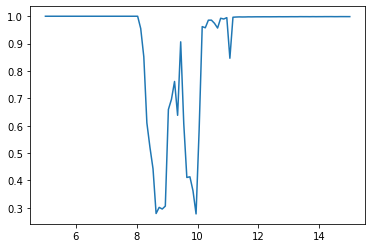

In [12]:
plt.plot(input, total_gbc_model)
plt.show()